In [1]:
import zstandard as zstd
import databento as db
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [2]:
MICRO_PIP_SIZE = 0.00001
TICKS_PER_BIN = 100

ASK_PRICE_COLUMNS = [f"ask_px_{str(i).zfill(2)}" for i in range(10)] 
ASK_VOL_COLUMNS = [f"ask_sz_{str(i).zfill(2)}" for i in range(10)] 
ASK_COUNT_COLUMNS = [f"ask_ct_{str(i).zfill(2)}" for i in range(10)]
ASK_ANCHOR_COLUMN = ["ask_px_00"] 


BID_PRICE_COLUMNS = [f"bid_px_{str(i).zfill(2)}" for i in range(10)] 
BID_VOL_COLUMNS = [f"bid_sz_{str(i).zfill(2)}" for i in range(10)] 
BID_COUNT_COLUMNS = [f"bid_ct_{str(i).zfill(2)}" for i in range(10)]
BID_ANCHOR_COLUMN = ["bid_px_00"] 


In [3]:
data_dir = "/Users/danielfisher/data/databento/AUDUSD-micro"

target_file = f"glbx-mdp3-202404{str(5).zfill(2)}.mbp-10.dbn.zst"

# Decompress .zst file
with open(f"{data_dir}/{target_file}", "rb") as f:
    decompressor = zstd.ZstdDecompressor()
    with open("trades.dbn", "wb") as out:
        decompressor.copy_stream(f, out)

# Now read the decompressed DBN file
data = db.DBNStore.from_file("trades.dbn")
df = data.to_df()

df = df[df.symbol == "M6AM4"]

In [4]:
df[ASK_PRICE_COLUMNS]

,ask_px_00,ask_px_01,ask_px_02,ask_px_03,ask_px_04,ask_px_05,ask_px_06,ask_px_07,ask_px_08,ask_px_09
ts_recv,,,,,,,,,,
2024-04-05 00:00:00+00:00,0.6602,0.6603,0.6604,0.6605,0.6606,0.6607,0.6608,0.6609,0.6610,0.6611
2024-04-05 00:00:00.047623663+00:00,0.6602,0.6603,0.6604,0.6605,0.6606,0.6607,0.6608,0.6609,0.6610,0.6611
2024-04-05 00:00:00.047634153+00:00,0.6602,0.6603,0.6604,0.6605,0.6606,0.6607,0.6608,0.6609,0.6610,0.6611
2024-04-05 00:00:00.047801623+00:00,0.6602,0.6603,0.6604,0.6605,0.6606,0.6607,0.6608,0.6609,0.6610,0.6611
2024-04-05 00:00:01.354911264+00:00,0.6602,0.6603,0.6604,0.6605,0.6606,0.6607,0.6608,0.6609,0.6610,0.6611
...,...,...,...,...,...,...,...,...,...,...
2024-04-05 20:59:59.705364007+00:00,0.6594,0.6596,0.6597,0.6598,0.6599,0.6600,0.6601,0.6602,0.6603,0.6604
2024-04-05 20:59:59.705468590+00:00,0.6594,0.6596,0.6597,0.6598,0.6599,0.6600,0.6601,0.6602,0.6603,0.6604
2024-04-05 20:59:59.750880130+00:00,0.6594,0.6596,0.6597,0.6598,0.6599,0.6600,0.6601,0.6602,0.6603,0.6604


# Convert prices to integers

In [5]:
df[ASK_PRICE_COLUMNS] = (df[ASK_PRICE_COLUMNS] / MICRO_PIP_SIZE).round().astype(int)
df[BID_PRICE_COLUMNS] = (df[BID_PRICE_COLUMNS] / MICRO_PIP_SIZE).round().astype(int)

# Gropuby

In [6]:
SAMPLES = 500 * TICKS_PER_BIN
stop = SAMPLES + 120_000
start = stop - SAMPLES


sub_df = pl.DataFrame(df[start:stop])
sub_df = sub_df.with_columns(
    (pl.int_range(0, SAMPLES) // TICKS_PER_BIN).alias("tick_bin"))

In [7]:
sub_df.describe()

statistic,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_ct_01,ask_ct_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_ct_02,ask_ct_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_ct_03,ask_ct_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_ct_04,ask_ct_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_ct_05,ask_ct_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_ct_06,ask_ct_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_ct_07,ask_ct_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol,tick_bin
str,str,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""50000""",50000.0,50000.0,50000.0,"""50000""","""50000""",50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,"""50000""",50000.0
"""null_count""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""","""2024-04-05 12:53:02.143650+00:…",10.0,1.0,4.2007845e7,null,null,0.18948,0.657332,5.19702,127.881,14333.49712,6.5376e7,65727.994,65738.5248,31.15262,28.34674,8.56594,7.88246,65717.994,65748.5248,53.04182,49.36118,11.87638,10.82686,65707.994,65758.5248,75.8772,63.35124,11.50322,10.24174,65697.994,65768.5248,128.08002,116.41924,12.5253,10.87106,65687.994,65778.5248,158.4609,149.99166,12.76596,10.82304,65677.994,65788.5248,184.34018,195.02266,13.3591,11.19242,65667.994,65798.5248,213.31586,197.14526,13.45458,11.19334,65657.994,65808.5248,224.93502,201.77704,13.33398,10.69392,65647.994,65818.5248,222.27518,207.847,13.24832,10.24028,65637.994,65828.5248,226.01774,212.4422,13.0369,9.69228,null,249.5
"""std""",null,0.0,0.0,0.0,null,null,0.949503,0.000481,21.582042,16.46163,1718.541023,813218.448044,46.931738,46.872974,19.721477,19.391171,4.084883,3.479104,46.931738,46.872974,40.587185,32.075816,2.57868,1.656302,46.931738,46.872974,100.901954,91.702929,2.338679,1.672172,46.931738,46.872974,127.625228,131.107182,3.120531,1.93714,46.931738,46.872974,150.896765,153.521696,2.868385,2.010056,46.931738,46.872974,161.218683,161.794591,3.53477,2.173893,46.931738,46.872974,177.965358,167.977594,4.145398,2.235151,46.931738,46.872974,205.794891,198.255748,4.289784,2.19873,46.931738,46.872974,228.147143,220.63606,4.626433,2.16285,46.931738,46.872974,244.009234,228.174556,4.96664,2.092529,null,144.338722
"""min""","""2024-04-05 12:33:31.394340+00:…",10.0,1.0,4.2007845e7,"""A""","""A""",0.0,0.6548,1.0,0.0,11268.0,6.4033602e7,65620.0,65640.0,1.0,1.0,1.0,1.0,65610.0,65650.0,13.0,12.0,6.0,6.0,65600.0,65660.0,13.0,13.0,6.0,7.0,65590.0,65670.0,16.0,13.0,6.0,6.0,65580.0,65680.0,19.0,24.0,7.0,6.0,65570.0,65690.0,19.0,24.0,7.0,5.0,65560.0,65700.0,19.0,24.0,8.0,5.0,65550.0,65710.0,19.0,25.0,8.0,5.0,65540.0,65720.0,18.0,25.0,7.0,5.0,65530.0,65730.0,12.0,7.0,7.0,5.0,"""M6AM4""",0.0
"""25%""","""2024-04-05 12:39:17.903375+00:…",10.0,1.0,4.2007845e7,null,null,0.0,0.657,1.0,130.0,13284.0,6.4645834e7,65690.0,65700.0

In [8]:
sub_df[2020:2030][ASK_PRICE_COLUMNS + ["tick_bin"]]

ask_px_00,ask_px_01,ask_px_02,ask_px_03,ask_px_04,ask_px_05,ask_px_06,ask_px_07,ask_px_08,ask_px_09,tick_bin
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20
65730,65740,65750,65760,65770,65780,65790,65800,65810,65820,20


<Axes: >

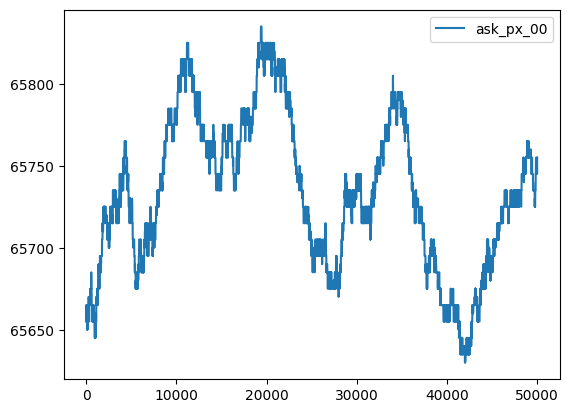

In [9]:
((sub_df[ASK_ANCHOR_COLUMN] + sub_df[BID_ANCHOR_COLUMN]) / 2).to_pandas().plot()

In [10]:
most_recent_mid_price = ((sub_df[-1][ASK_ANCHOR_COLUMN] + sub_df[-1][BID_ANCHOR_COLUMN]) / 2).to_numpy()[0][0]

ask_bin_start = most_recent_mid_price + (1 / 2)
bid_bin_start = most_recent_mid_price - (1 / 2) 

ask_price_bins = np.arange(ask_bin_start, ask_bin_start+(200+1), 1)
bid_price_bins = np.arange(bid_bin_start, bid_bin_start-(200+1), -1)


price_bins = np.array(list(bid_price_bins[::-1]) + list(ask_price_bins))

# Create a dictionary {price: index}
price_to_index = {int(price): idx for idx, price in enumerate(price_bins)}

## Price to pixel index mapping

### ASk Prices

Shape of grouped_ask_price_columns: (500, 10)
Shape of grouped_ask_volume_columns: (500, 10)


/var/folders/c1/b44hs2pd1g95qxd9ngltvxsr0000gn/T/ipykernel_78227/2036958029.py:39: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(mapped_volumes[::-1, :]), origin="upper")
/var/folders/c1/b44hs2pd1g95qxd9ngltvxsr0000gn/T/ipykernel_78227/2036958029.py:44: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ask_market_volume), origin="upper")


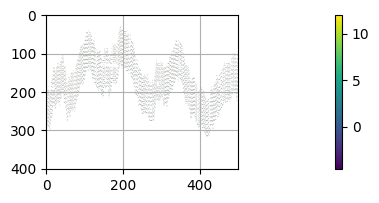

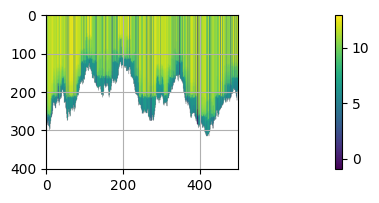

In [55]:
grouped_ask_price_columns = sub_df[ASK_PRICE_COLUMNS + ["tick_bin"]].group_by(["tick_bin"]).mean().sort(by="tick_bin") // 1  # deals with mid point median e.g. 2, 3 -> 2.5
grouped_ask_volume_columns = sub_df.select(ASK_VOL_COLUMNS + ["tick_bin"]) \
      .group_by("tick_bin") \
      .agg([
          pl.col(col).var().alias(f"{col}") for col in ASK_VOL_COLUMNS
      ]).sort(by="tick_bin")[ASK_VOL_COLUMNS]
idx_columns = []
for col in ASK_PRICE_COLUMNS:
    idx_column = f"{col}_idx"
    grouped_ask_price_columns = grouped_ask_price_columns.with_columns(
        pl.col(col).replace_strict(price_to_index, default=None).alias(idx_column)
    )
    idx_columns.append(idx_column)

grouped_ask_price_columns = grouped_ask_price_columns[idx_columns]

print("Shape of grouped_ask_price_columns:", grouped_ask_price_columns.shape)
print("Shape of grouped_ask_volume_columns:", grouped_ask_volume_columns.shape)


y_coords = grouped_ask_price_columns.to_numpy().T
x_coords = np.tile(np.arange(y_coords.shape[1]), (y_coords.shape[0], 1))
mapped_volumes = np.zeros((len(price_to_index), y_coords.shape[1])) * np.nan

null_mask = np.isnan(y_coords)
y_coords = y_coords[~null_mask].flatten().astype(int)
x_coords = x_coords[~null_mask].flatten().astype(int)
volume = grouped_ask_volume_columns.to_numpy().T[~null_mask].flatten()
mapped_volumes[y_coords, x_coords] = volume


nan_mask = np.isnan(mapped_volumes)
mapped_volumes[nan_mask] = 0 
ask_market_volume = np.cumsum(mapped_volumes, axis=0)
ask_market_volume = ask_market_volume[::-1, :]


plt.figure(figsize=(25,2))
plt.imshow(np.log(mapped_volumes[::-1, :]), origin="upper")
plt.grid(True)  # Turns on the grid
plt.colorbar()

plt.figure(figsize=(25,2))
plt.imshow(np.log(ask_market_volume), origin="upper")
plt.grid(True)  # Turns on the grid
plt.colorbar()


### Bid Prices

/var/folders/c1/b44hs2pd1g95qxd9ngltvxsr0000gn/T/ipykernel_78227/4197100439.py:36: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(mapped_volumes[::-1, :]), origin="upper")
/var/folders/c1/b44hs2pd1g95qxd9ngltvxsr0000gn/T/ipykernel_78227/4197100439.py:41: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(bid_market_volume), origin="upper")


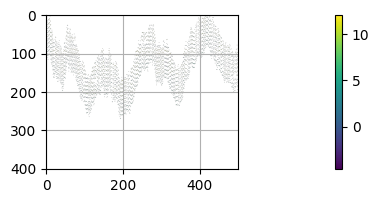

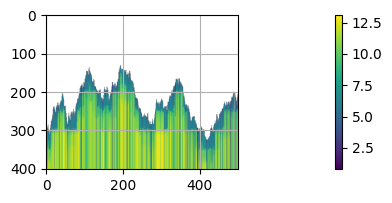

In [56]:
grouped_bid_price_columns = sub_df[BID_PRICE_COLUMNS + ["tick_bin"]].group_by(["tick_bin"]).mean().sort(by="tick_bin") // 1  # deals with mid point median e.g. 2, 3 -> 2.5
grouped_bid_volume_columns = sub_df.select(BID_VOL_COLUMNS + ["tick_bin"]) \
      .group_by("tick_bin") \
      .agg([
          pl.col(col).var().alias(f"{col}") for col in BID_VOL_COLUMNS
      ]).sort(by="tick_bin")[BID_VOL_COLUMNS]
idx_columns = []
for col in BID_PRICE_COLUMNS:
    idx_column = f"{col}_idx"
    grouped_bid_price_columns = grouped_bid_price_columns.with_columns(
        pl.col(col).replace_strict(price_to_index, default=None).alias(idx_column)
    )
    idx_columns.append(idx_column)

grouped_bid_price_columns = grouped_bid_price_columns[idx_columns]

y_coords = grouped_bid_price_columns.to_numpy().T
x_coords = np.tile(np.arange(y_coords.shape[1]), (y_coords.shape[0], 1))
mapped_volumes = np.zeros((len(price_to_index), y_coords.shape[1])) * np.nan

null_mask = np.isnan(y_coords)
y_coords = y_coords[~null_mask].flatten().astype(int)
x_coords = x_coords[~null_mask].flatten().astype(int)
volume = grouped_bid_volume_columns.to_numpy().T[~null_mask].flatten()
mapped_volumes[y_coords, x_coords] = volume


nan_mask = np.isnan(mapped_volumes)
mapped_volumes[nan_mask] = 0 
mapped_volumes = mapped_volumes[::-1, :]  

bid_market_volume = np.cumsum(mapped_volumes, axis=0)


plt.figure(figsize=(25,2))
plt.imshow(np.log(mapped_volumes[::-1, :]), origin="upper")
plt.grid(True)  # Turns on the grid
plt.colorbar()

plt.figure(figsize=(25,2))
plt.imshow(np.log(bid_market_volume), origin="upper")
plt.grid(True)  # Turns on the grid
plt.colorbar()


## Combine and normalise

/var/folders/c1/b44hs2pd1g95qxd9ngltvxsr0000gn/T/ipykernel_78227/212601805.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(combined_market_volume), origin="upper")


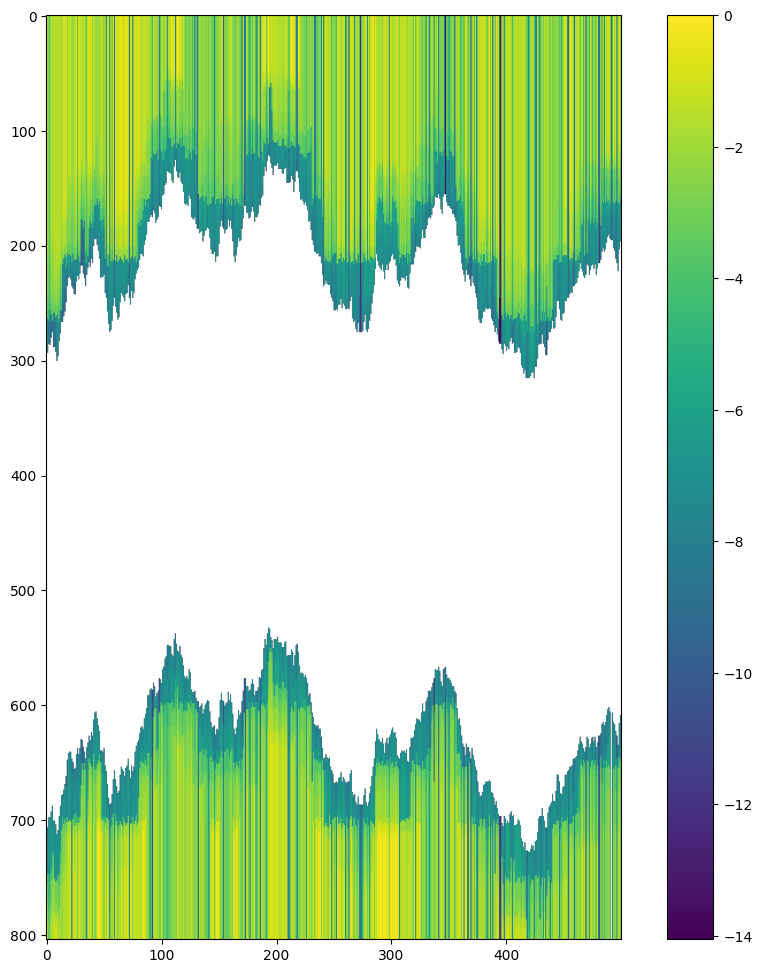

In [57]:
combined_market_volume = np.concat([ask_market_volume, bid_market_volume], axis=0)


combined_market_volume_max = combined_market_volume.max()
combined_market_volume_min = combined_market_volume.min()
combined_market_volume = (combined_market_volume - combined_market_volume_min) / (combined_market_volume_max - combined_market_volume_min)

plt.figure(figsize=(12,12))
plt.imshow(np.log(combined_market_volume), origin="upper")
plt.colorbar()

## Alternative combination

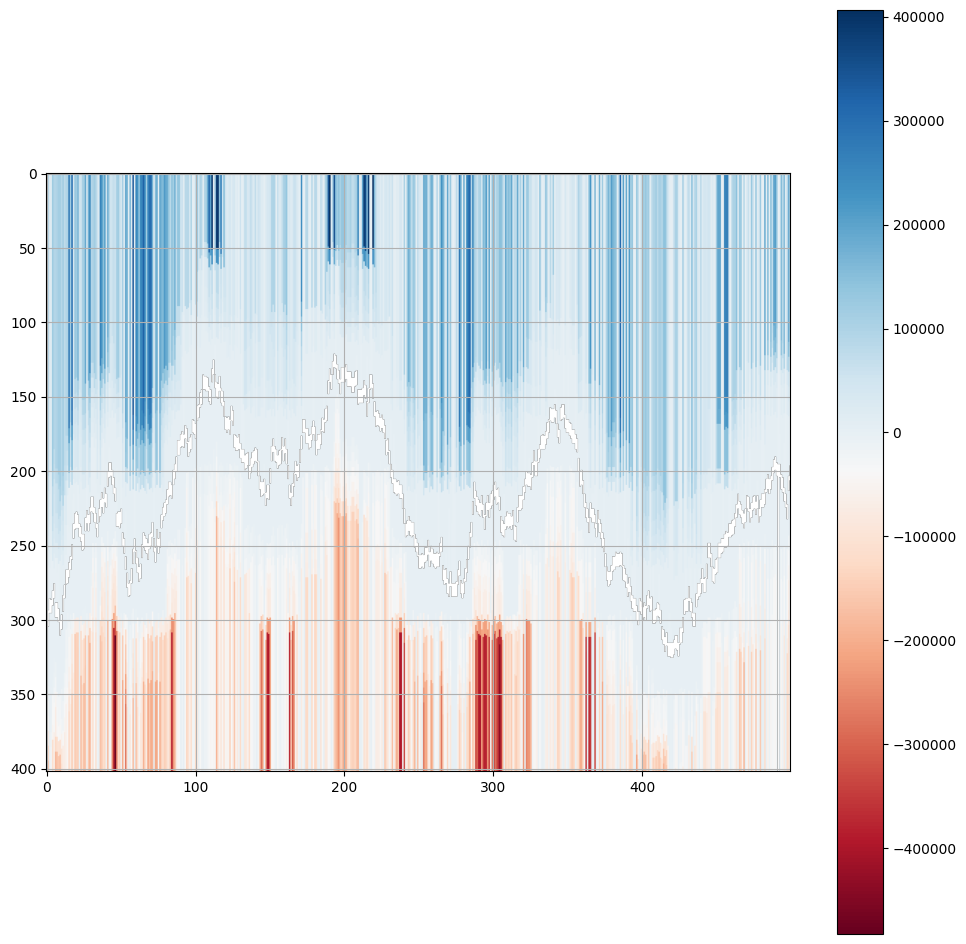

In [58]:

combined = ask_market_volume - bid_market_volume

mask = combined == 0 
combined[mask] = np.nan

plt.figure(figsize=(12,12))
plt.imshow((combined), cmap="RdBu")
plt.grid(True)  # Turns on the grid
plt.colorbar()
plt.show()

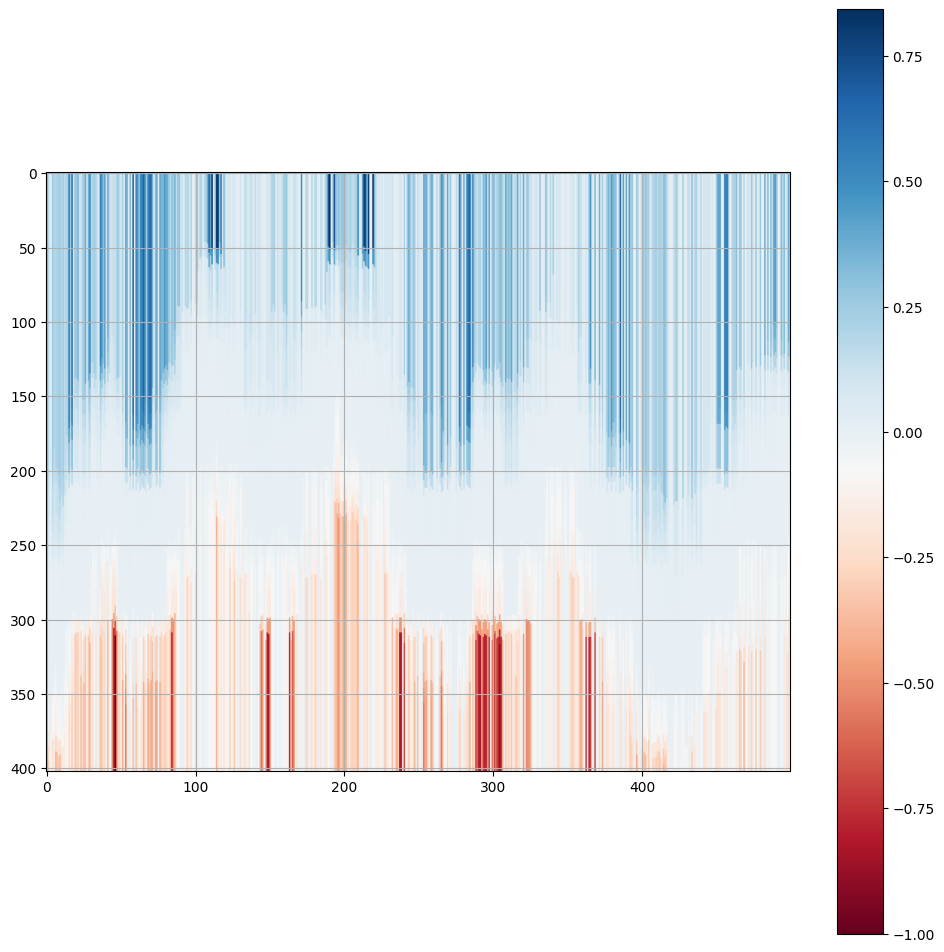

In [59]:

combined = ask_market_volume - bid_market_volume
neg_mask = combined < 0

abs_combined = np.abs(combined)

# min is always 0 volume
normed_abs_combined = (abs_combined - 0 ) / (abs_combined.max() - 0)
normed_abs_combined[neg_mask] *= -1



plt.figure(figsize=(12,12))
plt.imshow((normed_abs_combined), cmap="RdBu", interpolation=None)
plt.grid(True)  # Turns on the grid
plt.colorbar()
plt.show()

In [94]:
normed_abs_combined.shape

(402, 500)